# **Lab 5: Ordinary differential equations**
**Johan Ledéus**

# **Introduction**

Homework 5 for DD2363 Methods in Scientific Computing


# Methods

## Mandatory assignments

###1. Function: Time stepping for scalar initial value problem $du/dt = f(u,t)$

####Input: final time $T$, function $f(u,t)$, initial value $u(0)$
####Output: approximation $U(t_n)$ for the time interval $[0,T]$ 
####Test: verify $(i)$ accuracy, and $(ii)$ stability with respect to linear model problem $du/dt = a*u$, with real number $a<0$.  

#### Solution
Given that we want to approximate $U(t_n)$ we can discretize the values in the time interval $[0,T]$. We can reformulate the trapezoidal quadrature rule to a time stepping method.

$$U(t_n) - U(t_{n-1}) =\int_{t_{n-1}}^{t_n}f(u_t,t)dt$$

$$U(t_n) = U(t_{n-1}) + \int_{t_{n-1}}^{t_n}f(u_t,t)dt \approx U(t_{n-1}) + \frac{k_n(f(u_n,t_n) + f(u_{n-1},t_{n-1}))}{2} $$

This is the Trapezoidal time stepping method described in algorithm 19 in the course litterature.

In [0]:
import numpy as np

def approx_method(f,u1,k,t1,t2):
  u2 = u1 + (k/2)*(f(u1,t1) + f(u1,t1))
  new = np.NINF
  count = 0
  while np.linalg.norm(u2-new) > 1e-5 and count < 100:
    new = u2
    u2 = u1 + (k/2)*(f(u1,t1) + f(u2,t1))
    count += 1
  return u2

def trapezoidal_time_stepping(T,f,u,t = 0.001):
  # I = [0,T], k = timestep
  U = [u]
  X = [0]
  i = t
  while i < T:
    u_1 = approx_method(f,u,t,i,i+1)
    u = u + (t/2)*(f(u,i) + f(u_1,i+t))
    U.append(u)
    X.append(i)
    i += t
  return U, X

# Theta method, similar to the previous one
def theta_time_stepping(T,f,u,theta,t = 0.001):
  # I = [0,T], k = timestep
  U = [u]
  X = [0]
  i = t
  while i < T:
    u_1 = approx_method(f,u,t,i,i+1)
    u = u + t*((1-theta)*f(u,i) + theta*f(u_1,i+t))
    U.append(u)
    X.append(i)
    i += t
  return U, X






###2. Function: Time stepping for system of initial value problems $du/dt = f(u,t)$

####Input: final time $T$, vector function $f(u,t)$, initial value vector $u(0)$
####Output: approximation vector $U(t_n)$ for the time interval $[0,T]$ 
####verify (i) accuracy, and (ii) stability with respect to a linear model problem $du/dt = Au$, for $A$ a real matrix with real positive eigenvalues.  

#### Solution



In [0]:
# Same as above




# Results

####1. Function: Time stepping for scalar initial value problem $du/dt = f(u,t)$

For this test case I decided to solve the initial value problem with.

$$f(u,t) = t^2 + 3t - 1$$
$$u_0 = 1$$
$$T = 1 ,([0,1])$$

which has the exact solution $\frac{11}{6} \approx 1.8333333$. We can see the accuracy in the second plot.

#####Test: For accuracy linear model problem $du/dt = a*u$, with real number $a<0

$$f(u,t) = -20u$$
$$u_0 = 1$$
has the exact solution
$$U(t) = e^{-20t}$$
And we can see that the approximation is stable in the second plot since the error gets smaller.

I.e the  trapezoidal rule is absolutely stable  $$|\frac{1+\frac{h \lambda}{2}}{1-\frac{h \lambda}{2}}| < 1$$ 

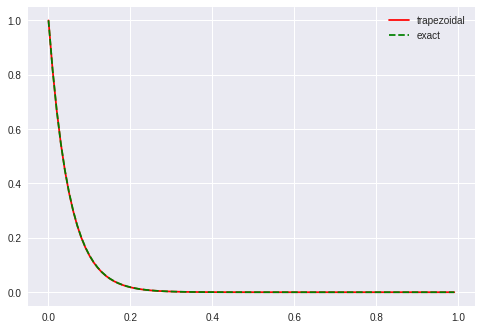

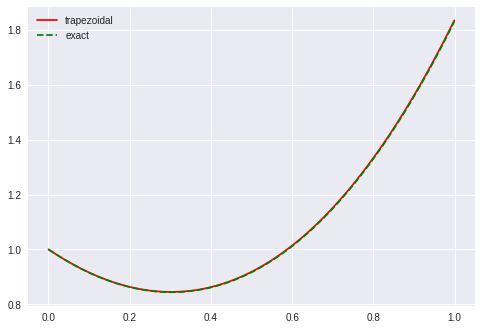

In [2]:
# Test for assignment 1
import matplotlib.pyplot as plt
import numpy as np

f = lambda u,t : -20*u # y' = Lambday
F = lambda t : np.exp(-20*t) # Exact y(t) = y0*e^Lambda*t



U, X = trapezoidal_time_stepping(1, f, 1, 0.01)

plt.plot(X, U, 'r')
plt.plot(X, [F(x) for x in X], 'g--')
plt.legend(('trapezoidal','exact'))
plt.show()

f = lambda u, x : x**2 + 3*x -1
F = lambda x : (x*x*x)/3 + (3/2)*x*x - x + 1
U, X = trapezoidal_time_stepping(1, f, 1, 0.001)

plt.plot(X, U, 'r')
plt.plot(X, [F(x) for x in X], 'g--')
plt.legend(('trapezoidal','exact'))
plt.show()



We can also see that the error is decreased when we decrease the step size.

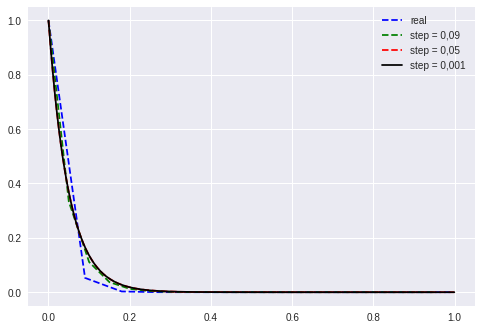

In [3]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda u,t : -20*u # y' = Lambday
F = lambda t : np.exp(-20*t) # Exact y(t) = y0*e^Lambda*t


steps = [(.09,'b--'),(.05,'g--'),(0.001,'r--')]
for step in steps:
  U, X = trapezoidal_time_stepping(1, f, 1, step[0])
  plt.plot(X, U, step[1])
plt.plot(X, [F(x) for x in X], 'k')

plt.legend(('real', 'step = 0,09','step = 0,05', 'step = 0,001'))
plt.show()

###2.

In a similar way we can show accuracy and stability for ivp with vector. 
$$f(u,t) = Au, U(0) = u_0$$
has the solution $U(t) = u_0e^{At}$. If the eigenvalues are negative the method is stable.

In the plot below I used $A = [[-1,2],[0,-1]], u_0 = [0.3,2]$ and we can see that the approximation is both accurate and stable.


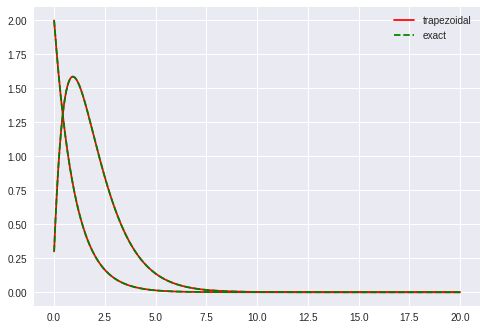

In [4]:
# Test for assignment 2
from scipy.linalg import expm
f = lambda u,t : np.array([(-1,2),(0,-1)]).dot(u)
F = lambda t : expm(np.array([(-1,2),(0,-1)])*t).dot([0.3,2])

u0 = np.array([0.3,2])

U, X = trapezoidal_time_stepping(20, f, u0, 0.01)


plt.plot(X, [u[0] for u in U], 'r')
plt.plot(X, [F(x)[0] for x in X], 'g--')

plt.plot(X, [u[1] for u in U], 'r')
plt.plot(X, [F(x)[1] for x in X], 'g--')

plt.legend(('trapezoidal','exact'))
plt.show()


In a similar way the error is decreased with a decreased step size

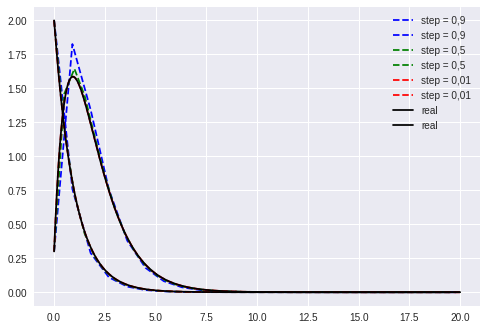

In [5]:
f = lambda u,t : np.array([(-1,2),(0,-1)]).dot(u)
F = lambda t : expm(np.array([(-1,2),(0,-1)])*t).dot([0.3,2])

u0 = np.array([0.3,2])


steps = [(.9,'b--'),(.5,'g--'),(0.01,'r--')]
for step in steps:
  U, X = trapezoidal_time_stepping(20, f, u0, step[0])
  plt.plot(X, [u[0] for u in U], step[1])
  plt.plot(X, [u[1] for u in U], step[1])
  

plt.plot(X, [F(x)[0] for x in X], 'k-')
plt.plot(X, [F(x)[1] for x in X], 'k-')
  
  
plt.legend(( 'step = 0,9','step = 0,9','step = 0,5', 'step = 0,5','step = 0,01','step = 0,01','real','real'))
plt.show()

# Discussion

This lab was interesting to implement and the results were something that I expected.